## Global Terrorism Prediction ISPA Project

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install scipy

In [ ]:
!pip install wordcloud

In [ ]:
file = 'globalterrorismdb_0718dist.csv'
df = pd.read_csv(file, encoding= 'ISO-8859-1', low_memory=False)

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed', 'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
df.isnull().sum()


Year               0
Month              0
Day                0
Country            0
state            366
Region             0
city               0
latitude        3453
longitude       3454
AttackType         0
Killed          6002
Wounded         7963
Target           455
Summary        63676
Group              0
Target_type        0
Weapon_type        0
Motive         63968
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65040 entries, 0 to 65039
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         65040 non-null  int64  
 1   Month        65040 non-null  int64  
 2   Day          65040 non-null  int64  
 3   Country      65040 non-null  object 
 4   state        64674 non-null  object 
 5   Region       65040 non-null  object 
 6   city         65040 non-null  object 
 7   latitude     61587 non-null  float64
 8   longitude    61586 non-null  float64
 9   AttackType   65040 non-null  object 
 10  Killed       59038 non-null  float64
 11  Wounded      57077 non-null  float64
 12  Target       64585 non-null  object 
 13  Summary      1364 non-null   object 
 14  Group        65040 non-null  object 
 15  Target_type  65040 non-null  object 
 16  Weapon_type  65040 non-null  object 
 17  Motive       1072 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory usa

In [ ]:
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1])
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())
country_wounded = df.groupby('Country')['Wounded'].sum().reset_index()
most_wounded_country = country_wounded.loc[country_wounded['Wounded'].idxmax()]
print("Country with the most wounded:",most_wounded_country['Country'])

Country with the most attacks: Peru
City with the most attacks: Lima
Region with the most attacks: South America
Group with the most attacks: Shining Path (SL)
Most Attack Types: Bombing/Explosion
Country with the most wounded: India


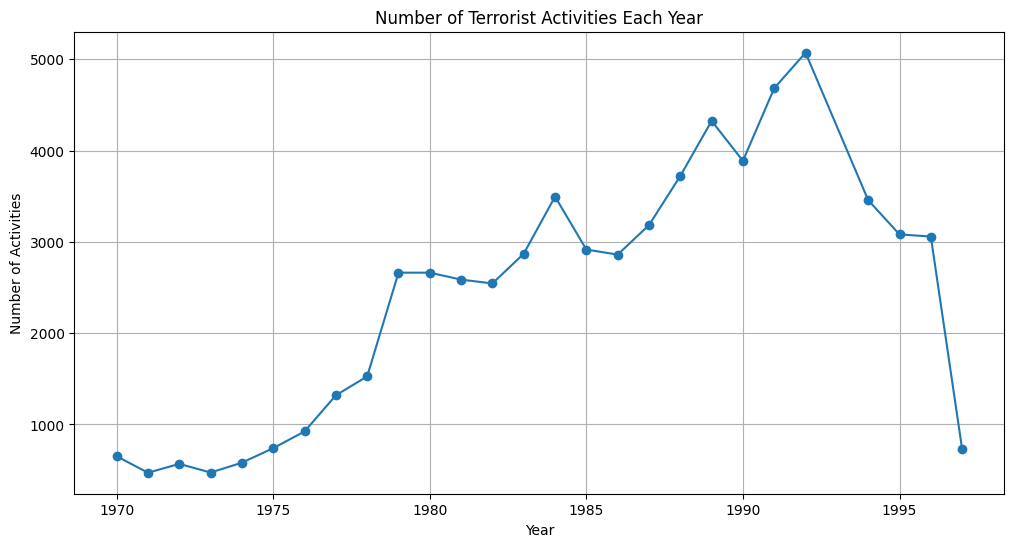

In [ ]:
terrorist_activities_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(terrorist_activities_per_year.index, terrorist_activities_per_year.values, marker='o', linestyle='-')
plt.title('Number of Terrorist Activities Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Activities')
plt.grid(True)

plt.show()

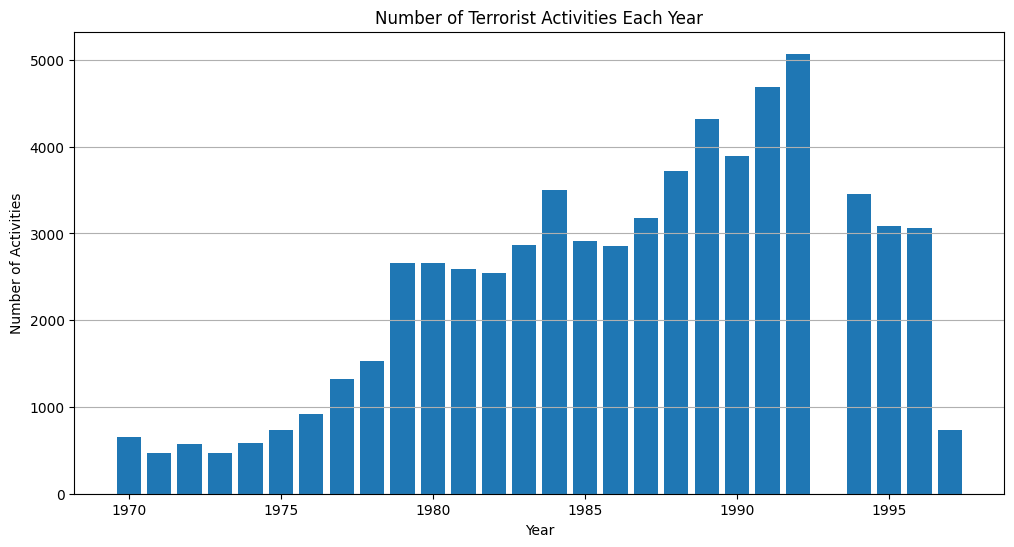

In [ ]:
terrorist_activities_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(terrorist_activities_per_year.index, terrorist_activities_per_year.values)
plt.title('Number of Terrorist Activities Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Activities')
plt.grid(axis='y')

plt.show()

In [ ]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

In [ ]:
terror1 = df.sort_values(by='casualities',ascending=False)[:40]
heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
heat.head()


Year,1976,1978,1980,1981,1982,1983,1984,1985,1987,1988,1989,1992,1994,1995,1996,1997
Country,,,,,,,,,,,,,,,,
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,329.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,396.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,321.0,0.0,0.0,0.0
Burundi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,389.5,275.0
Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,329.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


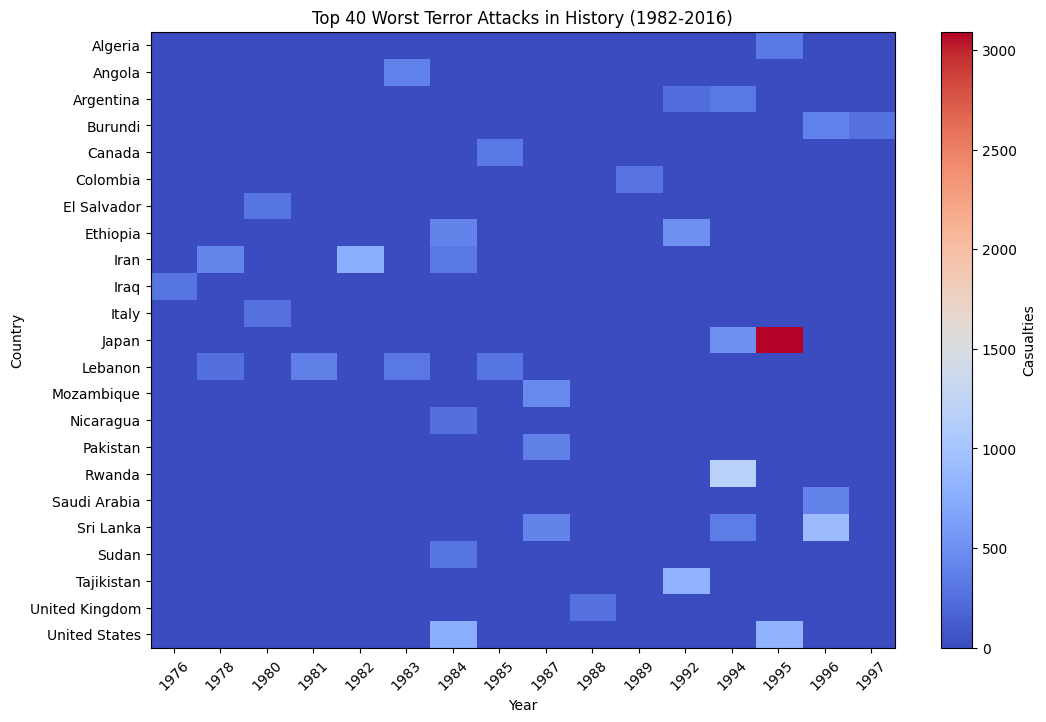

In [ ]:

plt.figure(figsize=(12, 8))
plt.imshow(heat.values, cmap='coolwarm', aspect='auto')

# Customize the plot
plt.colorbar(label='Casualties')
plt.title('Top 40 Worst Terror Attacks in History (1982-2016)')
plt.xlabel('Year')
plt.ylabel('Country')

# Set x-axis and y-axis tick labels
plt.xticks(np.arange(len(heat.columns)), heat.columns, rotation=45)
plt.yticks(np.arange(len(heat.index)), heat.index)

# Display the heatmap
plt.show()

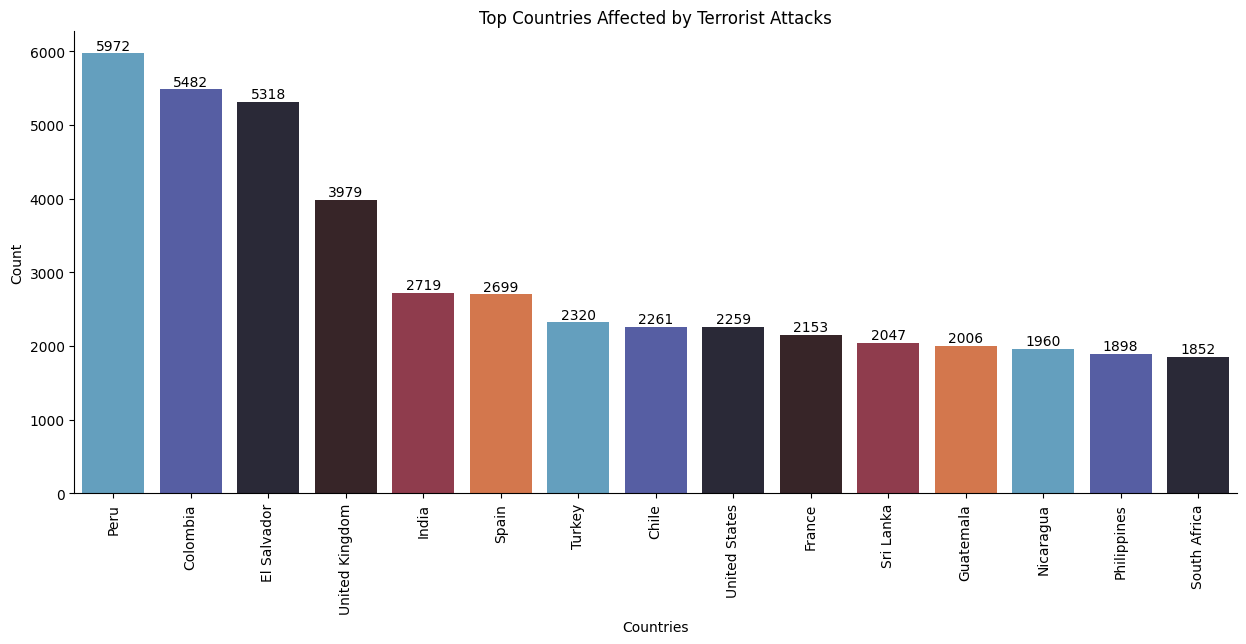

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = sns.color_palette("icefire")

plt.figure(figsize=(15, 6))
sns.barplot(
    x=df['Country'].value_counts()[:15].index,
    y=df['Country'].value_counts()[:15].values,
    palette=custom_palette
)

plt.title('Top Countries Affected by Terrorist Attacks')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)

for i, v in enumerate(df['Country'].value_counts()[:15].values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

sns.despine()
plt.show()


In [ ]:
!pip install folium

In [ ]:
import folium
from folium.plugins import MarkerCluster
filterYear = df['Year'] == 1970

In [ ]:
filterData = df[filterYear]
reqFilterData = filterData.loc[:,'city':'longitude']
reqFilterData = reqFilterData.dropna()
reqFilterDataList = reqFilterData.values.tolist()


In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [ ]:
df.Group.value_counts()[1:15]


Group
Shining Path (SL)                                   4470
Farabundo Marti National Liberation Front (FMLN)    3351
Irish Republican Army (IRA)                         2626
Basque Fatherland and Freedom (ETA)                 1745
Palestinians                                        1095
National Liberation Army of Colombia (ELN)          1024
Revolutionary Armed Forces of Colombia (FARC)       1024
Kurdistan Workers' Party (PKK)                      1010
New People's Army (NPA)                              968
Liberation Tigers of Tamil Eelam (LTTE)              916
Nicaraguan Democratic Force (FDN)                    895
Manuel Rodriguez Patriotic Front (FPMR)              829
Sikh Extremists                                      715
African National Congress (South Africa)             607
Name: count, dtype: int64

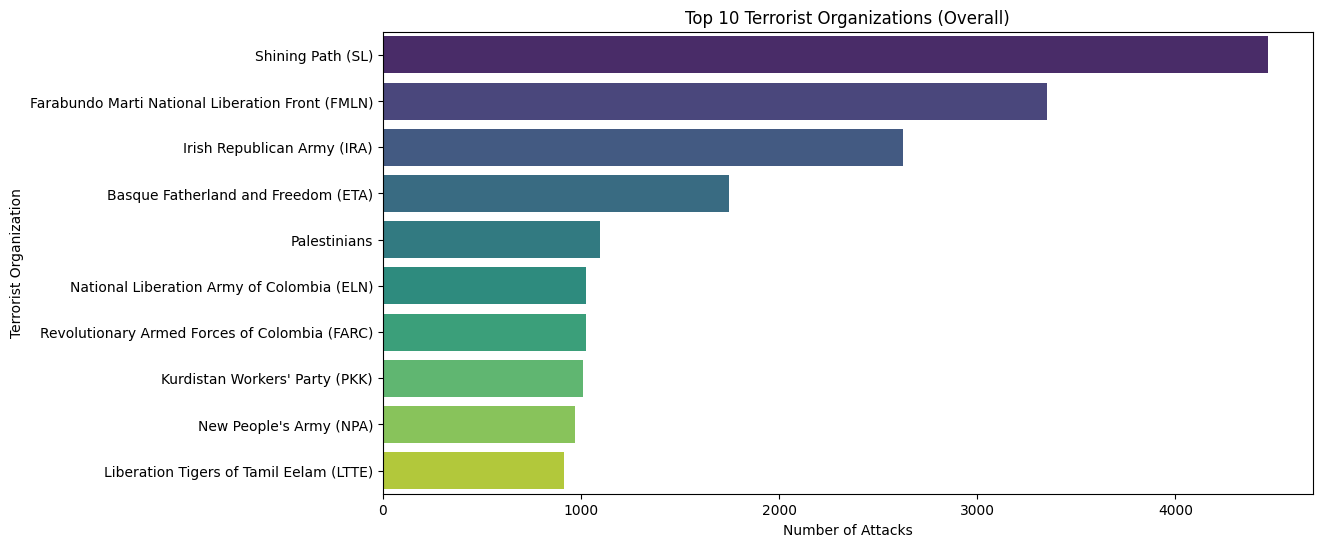

In [ ]:
filtered_df = df[df['Group'] != 'Unknown']
terrorist_organization_counts = pd.crosstab(filtered_df['Country'], filtered_df['Group'])

top_N = 10
top_organizations_overall = terrorist_organization_counts.stack().reset_index(name='Counts')
top_organizations_overall = top_organizations_overall.groupby('Group')['Counts'].sum().nlargest(top_N).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Counts', y='Group', data=top_organizations_overall, palette='viridis')
plt.title(f'Top {top_N} Terrorist Organizations (Overall)')
plt.xlabel('Number of Attacks')
plt.ylabel('Terrorist Organization')

plt.show()

Number of people killed by terror attack: 123166


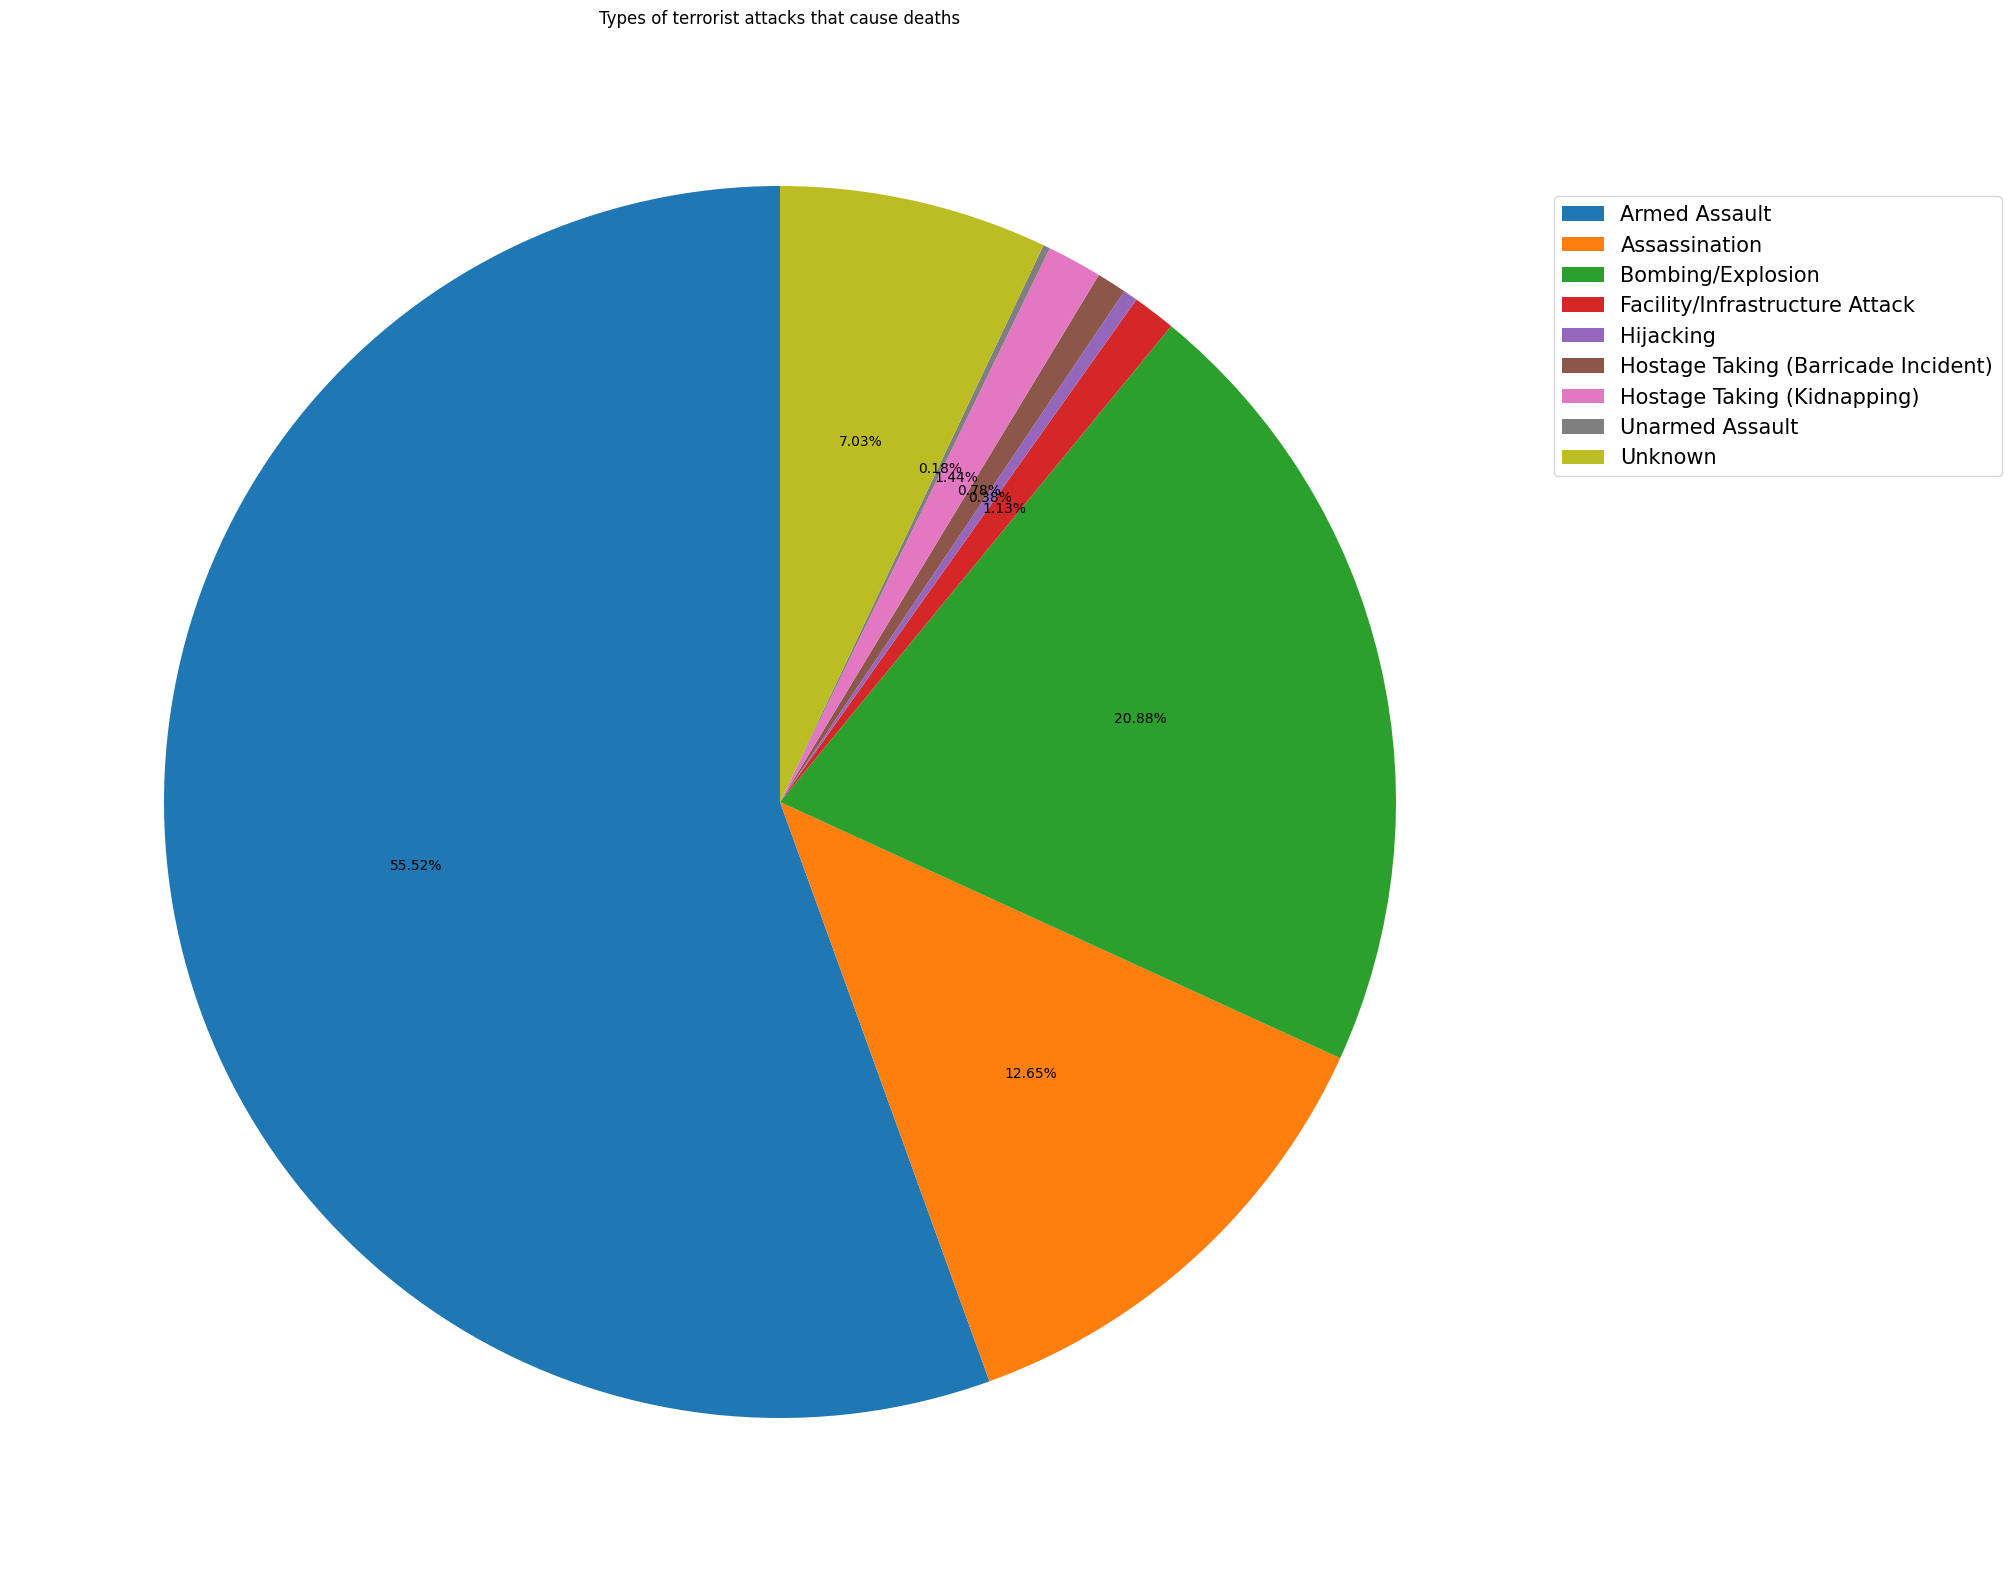

In [ ]:
killData = df.loc[:, 'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

attackData = df.loc[:, 'AttackType']
typeKillData = pd.concat([attackData, killData], axis=1)

typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
values = np.ravel(typeKillFormatData.values)

labels = typeKillFormatData.columns.tolist()

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), fontsize=15)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing
# Assuming 'AttackType' is the target variable
df.dropna(subset=['AttackType'], inplace=True)  # Drop rows with missing target values
X = df['Summary'].fillna('')  # Assuming 'Summary' is a relevant feature for prediction
y = df['AttackType']

# Encoding categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction (converting text data to numerical form)
vectorizer = TfidfVectorizer(max_features=1000)  # You may need to adjust max_features based on your data
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Training the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can try different kernels ('linear', 'rbf', etc.)
svm_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svm_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.43773062730627305

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.00      0.01      2979
           1       0.94      0.01      0.01      2374
           2       0.43      1.00      0.60      5577
           3       0.95      0.10      0.18       810
           4       0.00      0.00      0.00        70
           5       0.83      0.08      0.14       128
           6       0.00      0.00      0.00       561
           7       0.00      0.00      0.00        62
           8       0.00      0.00      0.00       447

    accuracy                           0.44     13008
   macro avg       0.41      0.13      0.11     13008
weighted avg       0.54      0.44      0.28     13008


Confusion Matrix:
[[  13    1 2961    2    0    2    0    0    0]
 [   5   15 2354    0    0    0    0    0    0]
 [   1    0 5575    1    0    0    0    0    0]
 [   2    0  727   81    0    0    0    0    0]
 [   0    0   70    0    0    